In [1]:
# Basic steps | Temel işlemler
import pandas as pd
import numpy as np

# Data visualization | Veri Görselleştirme
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Modelling | Modelleme
from sklearn.model_selection import train_test_split,RandomizedSearchCV,RepeatedStratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

### Data Load | Veriyi Yükleme

In [2]:
data=pd.read_csv('indian_liver_patient.csv')
df=data.copy()

In [3]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


### Editing Data | Verileri Düzenleme

In [6]:
df['Dataset']=df['Dataset'].replace(2,0)
df['Albumin_and_Globulin_Ratio']=df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean())
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [7]:
df.Dataset.unique()

array([1, 0])

In [8]:
df.Gender.unique()

array([0, 1])

In [9]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


### Grouping of the disease rate by gender | Hastalık oranının cinsiyetlere göre gruplanması

<Axes: >

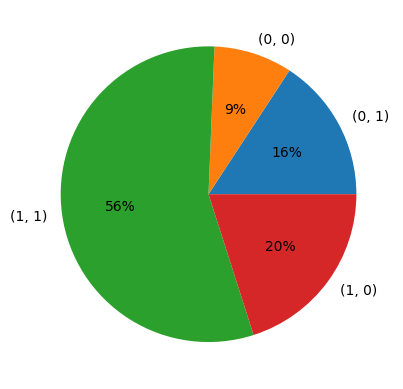

In [10]:
df.groupby('Gender')['Dataset'].value_counts().plot(kind='pie',autopct="%1.f%%",ylabel='')

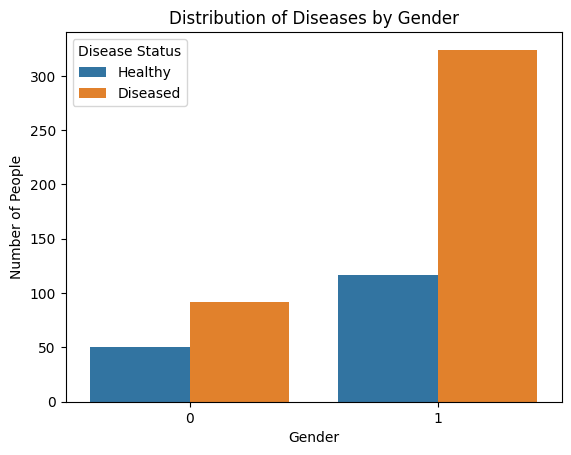

In [11]:
# Distribution of diseases by gender | Cinsiyete göre hastalık dağılımı
sns.countplot(data=df, x='Gender', hue='Dataset')
plt.title('Distribution of Diseases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.legend(title='Disease Status', labels=['Healthy', 'Diseased'])
plt.show()

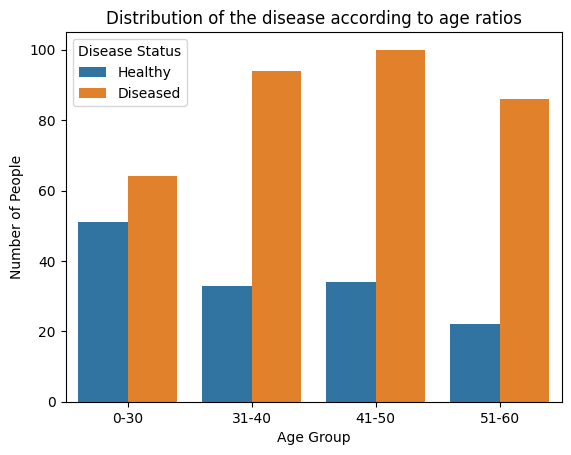

In [12]:
# Distribution of the disease according to age ratios | Hastalığın yaş oranlarına göre dağılımı
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60], labels=['0-30', '31-40', '41-50', '51-60'])

sns.countplot(data=df, x='Age_Group', hue='Dataset')
plt.title('Distribution of the disease according to age ratios')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.legend(title='Disease Status', labels=['Healthy', 'Diseased'])
plt.show()

### According to the graph above, there is no variable highly correlated with the 'dataset'(disease status).
### Yukarıdaki grafiğe göre 'dataset'(hastalık durumu) ile yüksek korele bir değişken bulunmuyor.

In [13]:
df.drop('Age_Group',axis=1,inplace=True)
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


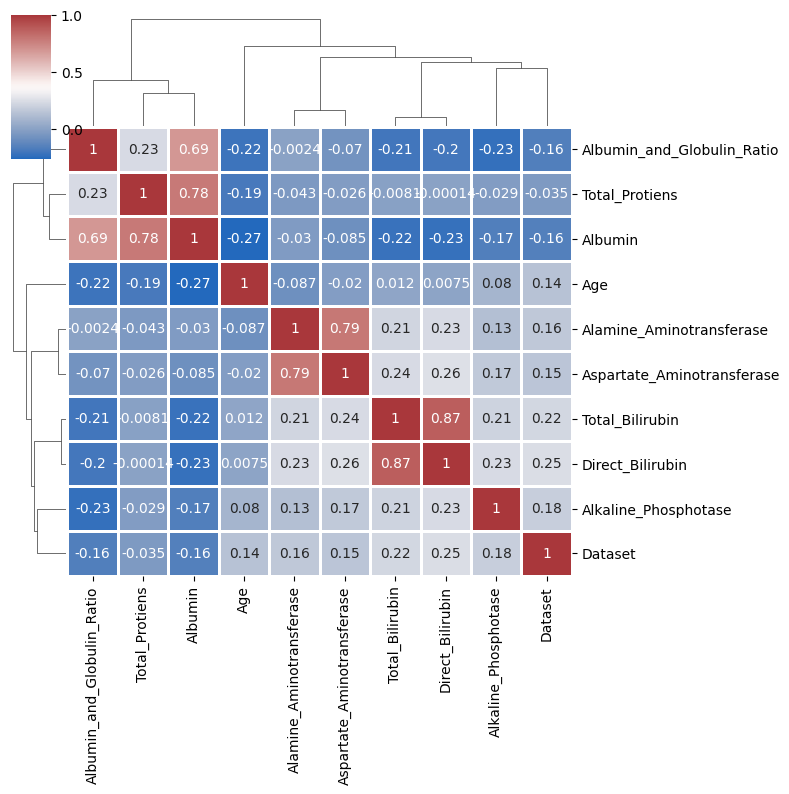

In [14]:
# Correlation map | Korelasyon haritası
a = df.drop(columns='Gender', axis=1)

b = sns.clustermap(a.corr(), cmap="vlag", dendrogram_ratio=(0.1, 0.2), annot=True, linewidth=0.8, figsize=(8, 8))

plt.show()

In [15]:
df = df.drop_duplicates()
df.duplicated().sum()

df.count()

Age                           570
Gender                        570
Total_Bilirubin               570
Direct_Bilirubin              570
Alkaline_Phosphotase          570
Alamine_Aminotransferase      570
Aspartate_Aminotransferase    570
Total_Protiens                570
Albumin                       570
Albumin_and_Globulin_Ratio    570
Dataset                       570
dtype: int64

***

## Creation of X and y variables for the model | Model için X ve y değişkenlerinin oluşturulması

In [16]:
X=df.drop('Dataset',axis=1)
y=df['Dataset']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Modeling: Decision Tree,K-Nearest Neighbors and Logistic Regression will be used
# Modelleme: Karar Ağaçları, K En Yakın Komşu ve Lojistik Regresyon Kullanılacak
models = {("DTC", DecisionTreeClassifier()),
          ("KNN", KNeighborsClassifier()),
          ("Log_Reg", LogisticRegression())}

finalResult = []  # score list
accuracy_list = []       # 
precision_score_list=[]

for name, model in models:
    model.fit(X_train, y_train)                                 # training
    model_result = model.predict(X_test)                        # prediction
    precisionScore = precision_score(y_test, model_result)      # precision score 
    accuracyScore = accuracy_score(y_test, model_result)        # precision score 
    finalResult.append((name, precisionScore,accuracyScore))    # Append as a tuple
    cm = confusion_matrix(y_test, model_result)                 # confusion matrix
    accuracy_list.append((name,cm))                             # add to cmList
print(finalResult)

import warnings
warnings.filterwarnings("ignore")

[('KNN', 0.7647058823529411, 0.6491228070175439), ('DTC', 0.7605633802816901, 0.5789473684210527), ('Log_Reg', 0.7755102040816326, 0.7280701754385965)]


c:\Users\Ahmet Safa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
model_score_chart=pd.DataFrame(finalResult,
               columns=['Model','Precision Score','Accuracy Score'])
model_score_chart

,Model,Precision Score,Accuracy Score
0,KNN,0.764706,0.649123
1,DTC,0.760563,0.578947
2,Log_Reg,0.775510,0.728070


#### According to the result we got, the best score belongs to Logistic Regression.We continue our way with this model. 
#### Aldığımız sonuca göre en iyi skor Logistic Regreession'a ait.Yolumuza bu modelle devam ediyoruz.

In [20]:
# Find the model with the highest accuracy score | En yüksek accuracy skoruna sahip olan modeli bul
best_model = max(finalResult, key=lambda x: x[2])  # Choose the highest score according to Accuracy| Accuracy'ye göre en yüksek skoru seç
best_model_name = best_model[0]

print(f"Best model: {best_model_name} - Accuracy: {best_model[2]:.2f}, Precision: {best_model[1]:.2f}")

last_model = [model for name, model in models if name == best_model_name][0]  # Find and assign the best model | En iyi modeli bul ve ata
last_model


Best model: Log_Reg - Accuracy: 0.73, Precision: 0.78


LogisticRegression()

***

### Model Tuning

In [21]:
model_params={
    'model':LogisticRegression(),
    'params':{
        'penalty': [11,12,'elasticnet','none'],
        'solver':['liblinear','lbfgs','saga'],
        'max_iter':[5,10,20,35,50,75,80,120,280]
    }
}

In [22]:
# Model and parameters | Model ve parametreler
model_params = {
    'model': LogisticRegression(),
    'params': {
        'penalty': ['l1', 'l2', 'elasticnet'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1,2,3,4,5,6,7,8,10,12,15,18,20,25,30,50,75, 100, 200]
    }
}

# Cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
scores = []

# Randomized Search
rs = RandomizedSearchCV(model_params['model'], model_params['params'], cv=cv, n_iter=10, error_score=np.nan)
rs.fit(X, y)

# Add best scores to list | En iyi skorları listeye ekle
scores.append([model_params['model'], dict(rs.best_params_), rs.best_score_])

print(scores)


[[LogisticRegression(), {'solver': 'saga', 'penalty': 'l1', 'max_iter': 10}, np.float64(0.712280701754386)]]


In [23]:
tuned_model=LogisticRegression(solver='liblinear',penalty='l1',max_iter=30)
tuned_model.fit(X_train,y_train)

LogisticRegression(max_iter=30, penalty='l1', solver='liblinear')

In [24]:
y_tuned_pred=tuned_model.predict(X_test)

## Final scores | Nihai sonuçlar

In [25]:
tuned_score=accuracy_score(y_test,y_tuned_pred)
print(f'{tuned_score:.2f}')

0.73


In [26]:
tuned_score2=precision_score(y_test,y_tuned_pred)
print(f'{tuned_score2:.2f}')

0.77


***

### Save the model | Modeli kaydetme

In [27]:
import pickle

with open("trained_model.pkl", "wb") as file:
    pickle.dump(tuned_model, file)

In [28]:
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,1,1.0,0.3,216,21,24,7.3,4.4,1.50,0


### Use of the model | Modelin kullanımı 

In [29]:
with open("trained_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

new_data = [[65, 0, 0.7, 0.1,187,12,18,6.8,3.3,0.7]]  # Sample Data | Örnek veri
result = loaded_model.predict(new_data)
print("Result:", result)

Result: [1]
